In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle

# Remove in case of error
%matplotlib widget

In [2]:
# Environment

obstacles = [([-3.5, 0], 1.5), ([3.5, 0], 1.5)] # Obstacle position and radius
lims = [[-10, 10], [-10, 10]] # Environment limits
goal = np.array([0, 5]) # Goal position
goal_radius = 2 # Goal radius

In [6]:
# True reward function
def true_reward(pos):
    reward = -0.001 # Travel penalty
    
    # Check for goal state
    dist_g = np.linalg.norm(pos - goal,2) # Distance to goal
    if dist_g <= goal_radius: # If inside
        reward += 1 # Goal reward
        
    # Check obstacle collisions
    for obs in obstacles:
        pos_o, rad = obs
        dist_o = np.linalg.norm(pos - pos_o,2) # Distance to obstacle
        if dist_o <= rad: # Collision penalty
            reward -= 1
            break
    
    # Check for borders
    if (pos[0] <= lims[0][0] or pos[0] >= lims[0][1]) or (pos[1] <= lims[1][0] or pos[1] >= lims[1][1]):
        reward -= 1 # Collision penalty
    
    return reward
        

In [7]:
# Generate grid
num_steps = 100
x = np.linspace(lims[0][0], lims[0][1], num_steps, endpoint=True)
y = np.linspace(lims[1][0], lims[1][1], num_steps, endpoint=True)

X, Y = np.meshgrid(x, y)

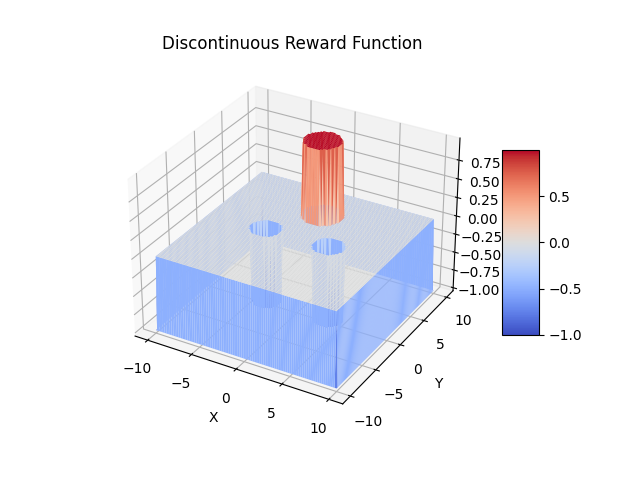

In [8]:
# Plot true reward function
Z_true = np.zeros(X.shape, dtype=float)
for i in range(len(x)):
    for j in range(len(y)):
        Z_true[i, j] = true_reward(np.array([X[i, j], Y[i, j]])) 
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_true, rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Discontinuous Reward Function')

plt.show()

In [18]:

# Continuous reward function
def cont_reward(pos):
    reward = -0.001 # Travel cost
    delta = 0.1
    
    # Goal position
    A_g = 1
    dist = goal_radius*0.95 - np.linalg.norm(pos - goal,2)
    reward += A_g * (1 + np.tanh(dist/delta))/2
    
    # Obstacles
    for obs, rad in obstacles:
        A_o = -1
        dist = rad - np.linalg.norm(pos - np.array(obs), 2)
        reward += A_o*(1 + np.tanh(dist/delta))/2
        
    # Borders
    reward += A_o * (1 + np.tanh((lims[0][0] - pos[0])/delta))/2
    reward += A_o * (1 + np.tanh((pos[0] - lims[0][1])/delta))/2
    reward += A_o * (1 + np.tanh((lims[1][0] - pos[1])/delta))/2
    reward += A_o * (1 + np.tanh((pos[1] - lims[1][1])/delta))/2
        
    return reward
    
    
    

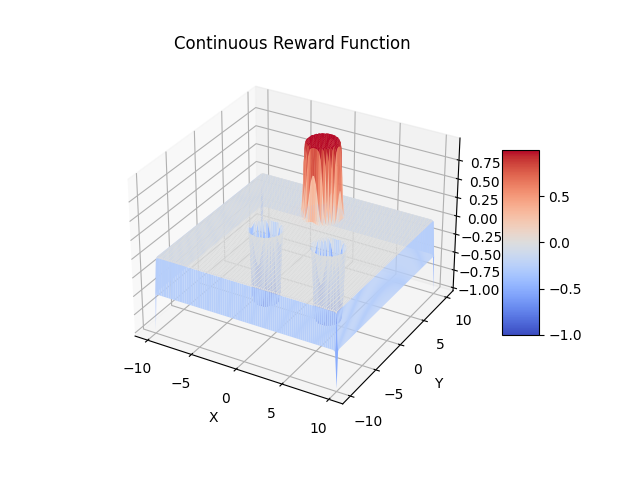

In [19]:
# Plot continuous reward function
Z_cont = np.zeros(X.shape, dtype=float)
for i in range(len(x)):
    for j in range(len(y)):
        Z_cont[i, j] = cont_reward(np.array([X[i, j], Y[i, j]])) 
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_cont, rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Continuous Reward Function')

plt.show()

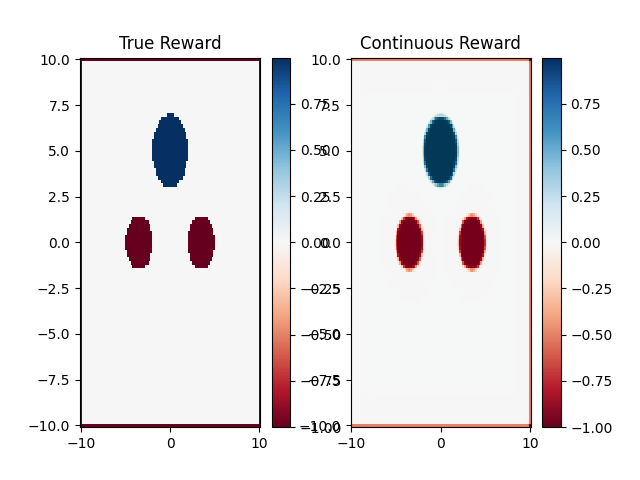

In [21]:
# Plot Heatmaps
fig = plt.figure()
ax1 = fig.add_subplot(121)
c1 = ax1.pcolormesh(X, Y, Z_true, cmap='RdBu')
ax1.set_title('True Reward')
fig.colorbar(c1, ax=ax1)

ax2 = fig.add_subplot(122)
c2 = ax2.pcolormesh(X, Y, Z_cont, cmap='RdBu')
ax2.add_patch(Circle(goal, goal_radius, alpha=0.1, facecolor='g', edgecolor='g'))
ax2.add_patch(Circle(obstacles[0][0], obstacles[0][1], alpha=0.1, facecolor='r', edgecolor='r'))
ax2.add_patch(Circle(obstacles[1][0], obstacles[1][1], alpha=0.1, facecolor='r', edgecolor='r'))
ax2.set_title('Continuous Reward')
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c2, ax=ax2)

plt.show()

In [ ]:
# Sigmoid goal and obstacles

